In [47]:
import importlib
import numpy as np
import argparse
import pickle
import os
import pandas as pd

import sys
sys.path.append('/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/v0.analysis/scripts/pythonScripts/functions/')

from v1_chains import IncDFCreator, increaseIncDF_binSize
import v1_chains

from incidenceToProjection import makeHiC_fromInc

import chains

In [4]:
number = '273'
a = "%05d%s" % (int(number),".pts")
print(a)

00273.pts


In [2]:
dataDir = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/v0_hypergraphSimulations/getMultiwayInteractions_fromBPChains/v3.multiwayConstraints'
inputDir = f'{dataDir}/inputData/'

chainDir = 'cell_1_10000_chains_reconstructed/'

In [3]:
int1 = [[1,20,30], [5,9,15], [1,22,35,49], [5,11,20,25,40]]
int2 = [[10,20,30], [30,43,50], [10,15,23,35,43,50]]

In [4]:
## Taking from Carlos
from scipy.spatial.distance import cdist

def chain_from_file(df):
    """Given x,y,z coordinates of chains, read into array"""
    x = df[df.columns[0]] #takes first column of the df
    y = df[df.columns[1]] #similarly for the second column
    z = df[df.columns[2]] #similarly for the third column
    a = [np.array([x[i], y[i], z[i]]) for i in range(len(x))] #get all the coordinates of the monomers and store them in a list
    return a

def interactions_from_chains(chain):
    """Given an array of coordinates, convert into df and 
    find pairwise distances"""
    df = pd.DataFrame(chain)
    distances = cdist(df, df)
    return distances

In [5]:
file_name = '04991.pts'
df = pd.read_csv(os.path.join(inputDir,chainDir, file_name), sep="\s+", comment="#", header=None)

In [6]:
chain = chain_from_file(df)
distMat = interactions_from_chains(chain)

In [8]:
distMat[0:10,0:10]

array([[  0.        , 150.        , 212.13203026, 189.88247098,
        211.28991041, 162.44758362, 205.22813345, 208.11321915,
        240.65718215, 245.34082348],
       [150.        ,   0.        , 149.99999421, 223.87016949,
        316.15807161, 292.32125722, 266.79783874, 295.59027722,
        255.7652817 , 274.21181533],
       [212.13203026, 149.99999421,   0.        , 150.00000081,
        262.35376382, 293.31623794, 267.88763592, 240.74117433,
        202.77187753, 161.99286883],
       [189.88247098, 223.87016949, 150.00000081,   0.        ,
        150.00000346, 241.64918663, 296.10150907, 202.7718821 ,
        263.20440158, 156.23918071],
       [211.28991041, 316.15807161, 262.35376382, 150.00000346,
          0.        , 150.00000195, 257.16645556, 123.47093251,
        259.29652663, 167.43003662],
       [162.44758362, 292.32125722, 293.31623794, 241.64918663,
        150.00000195,   0.        , 149.99999452, 112.42472549,
        214.33508223, 222.43947723],
       [20

In [36]:
importlib.reload(v1_chains)

<module 'v1_chains' from '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/v0.analysis/scripts/pythonScripts/functions/v1_chains.py'>

In [37]:
creator = v1_chains.IncDFCreator(4, 110, 300, 1)

In [38]:
print(distMat.shape)
df = pd.DataFrame(distMat)
A = creator.preprocessMat(df)
B = creator.perRow((A[0],4))

(51, 51)
[150.00000195 257.16645556 123.47093251 259.29652663 167.43003662
 279.21488441 278.99549333 247.77651121 219.24344204 127.5524992
 182.93579021 265.67702264 278.54872317 225.43274191 266.10931688
 214.61734354 197.86377334  74.35037633 213.60029308  96.4120117
 214.25113823 330.57581238 479.54875499 591.75268015 573.96035168
 603.9775574  610.64242445 603.9775574  610.64242445 606.17397111
 457.32268391 324.49759047 181.0596039  132.84374424  68.54673153
 123.26998994  68.54673153 127.56678316  60.28363927 179.28479222
 300.30967701 203.99866434 236.65185286 234.98035762 236.03257828
 240.65545678]
[4, 22, 24, 39, 41, 43]
(4, 22)
[[ 0.         74.35037633]
 [ 0.          0.        ]]
(4, 24)
[[ 0.        96.4120117]
 [ 0.         0.       ]]
(4, 39)
[[ 0.         68.54673153]
 [ 0.          0.        ]]
(4, 41)
[[ 0.         68.54673153]
 [ 0.          0.        ]]
(4, 43)
[[ 0.         60.28363927]
 [ 0.          0.        ]]
(22, 24)
[[ 0.         30.86462371]
 [ 0.        

In [43]:
for mult in int1:
    print(mult)
    print(distMat[np.ix_(mult, mult)])
    print("")

[1, 20, 30]
[[  0.         141.31006448 516.2266696 ]
 [141.31006448   0.         465.40301735]
 [516.2266696  465.40301735   0.        ]]

[5, 9, 15]
[[  0.         222.43947723 248.15968214]
 [222.43947723   0.         173.80726415]
 [248.15968214 173.80726415   0.        ]]

[1, 22, 35, 49]
[[  0.         248.97845784 295.33677763 517.849509  ]
 [248.97845784   0.         389.64427164 299.14635459]
 [295.33677763 389.64427164   0.         680.5578173 ]
 [517.849509   299.14635459 680.5578173    0.        ]]

[5, 11, 20, 25, 40]
[[  0.         250.51885942 237.06003055 245.74265237 233.54226316]
 [250.51885942   0.         202.80833243 118.9146936  272.97938084]
 [237.06003055 202.80833243   0.         119.44308644 141.45429125]
 [245.74265237 118.9146936  119.44308644   0.         167.78157952]
 [233.54226316 272.97938084 141.45429125 167.78157952   0.        ]]



In [44]:
print(distMat[np.ix_([22, 24, 39, 41, 43],[22, 24, 39, 41, 43])])

[[  0.          30.86462371  70.06896179  70.06896179  77.97795819]
 [ 30.86462371   0.          93.83519399  93.83519399 100.57071161]
 [ 70.06896179  93.83519399   0.           0.          17.59649148]
 [ 70.06896179  93.83519399   0.           0.          17.59649148]
 [ 77.97795819 100.57071161  17.59649148  17.59649148   0.        ]]


In [10]:
oneIter = creator.makeIncDF_fromChainDists_single(distMat)

In [11]:
exChain = oneIter[0]
ratios = oneIter[1]

In [12]:
numReads = exChain.shape[1]
print(numReads)
card = exChain.sum()
maxCard = card.max(0)
print(maxCard)

2261
8.0


In [13]:
exChain.index = ["Bin"+str(i) for i in exChain.index]

In [13]:
# def dfToDict(df,result_dict):
#     """Takes in an incidence DF and converts to 
#     a dictionary of hyperedges"""
#     for col in df.columns:
#         indices = df.index[df[col] == 1].tolist()
#         key = '_'.join(indices)
#         result_dict[key] = result_dict.get(key, 0) + 1
#     return(result_dict)

# inc_dict = {}
# inc_dict = dfToDict(df,inc_dict)

In [14]:
inc_dict = {}
inc_dict = chains.dfToDict(exChain,inc_dict)

iDF = chains.dictToDF(inc_dict)

In [15]:
A = ["_".join(["Bin"+str(j) for j in i]) for i in int1]
B = ["_".join(["Bin"+str(j) for j in i]) for i in int2]

In [16]:
print([x in inc_dict for x in A])
print([x in inc_dict for x in B])

[False, False, False, False]
[False, False, False]


### Read in generated pkl files and plot

In [48]:
pklDir = 'cell1_output/'
i = 1050
filePath = f'{dataDir}/{pklDir}/incDF_1_110_300_{i}.pkl'
f = pd.read_pickle(filePath)
print(f.iloc[0:10,0:10])
f.shape

(51, 89135)

In [50]:
#p = makeHiC_fromInc(f)
p.shape

(51, 51)

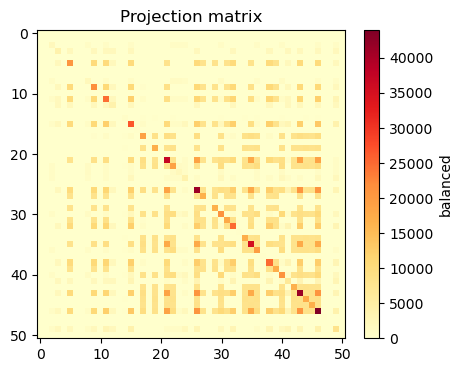

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

plt.figure(figsize=(6, 4))
im = plt.imshow(p, cmap="YlOrRd") #norm = LogNorm(vmax=4*10**4, vmin = 0.01)
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title("Projection matrix")
plt.show()

In [ ]:
## Read in example file
projMat = None
numFiles = 1000
counter = 0
for i in range(1000,numFiles):
    filePath = f'{dataDir}/{pklDir}/incDF_1_110_300_{i}.pkl'
    if os.path.isfile(filePath):
        counter += 1
        if projMat is None:
            projMat = np.loadtxt(filePath)
        else:
            projMat += np.loadtxt(filePath)
if projMat is not None:
    projMat = projMat.astype('float64')
    projMat /= counter

nrow = projMat.shape[0]